In [10]:
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Tensorflow
import tensorflow as tf

# TSNE Visualization
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape to a 2D array
num_samples, width, height = X_train.shape
X_train = X_train.reshape((num_samples, width * height))

num_samples, width, height = X_test.shape
X_test = X_test.reshape((num_samples, width * height))

In [12]:
print("Apply Random Forest without initializing any parameters\
(using their default values)...")
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print("Classification Report \n", classification_report(y_test, preds))

Apply Random Forest without initializing any parameters(using their default values)...
Accuracy: 0.9705
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Loop through multiple values for max_depth ...
max_depth = 5, accuracy = 86.25%
max_depth = 6, accuracy = 89.2%
max_depth = 7, accuracy = 91.79%
max_depth = 8, accuracy = 92.97%
max_depth = 9, accuracy = 93.87%
max_depth = 10, accuracy = 94.69%
max_depth = 11, accuracy = 95.42%
max_depth = 12, accuracy = 95.91%
max_depth = 13, accuracy = 96.28%
max_depth = 14, accuracy = 96.36%
max_depth = 15, accuracy = 96.78%
Highest accuracy: 96.78 % for max_depth = 15.



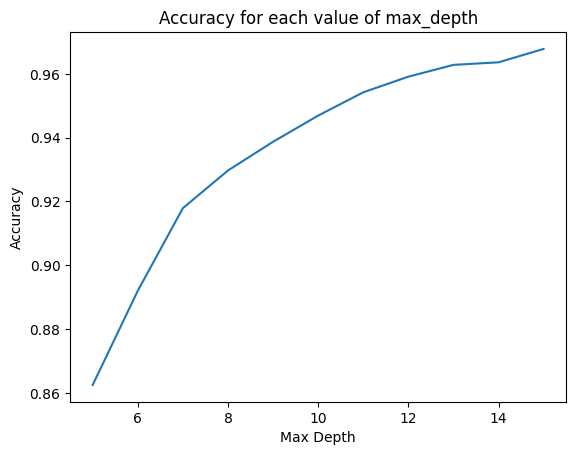

In [13]:
# Loop for max_depth value
print("Loop through multiple values for max_depth ...")
md_values = range(5, 16)
md_accuracies = []

values = np.arange(5, 16)
for md in values:
    # Train the classifier with the current value of 'max_depth'
    model = RandomForestClassifier(max_depth = md, random_state = 0)
    model.fit(X_train, y_train)

    # Evaluate the model
    eval_score = model.score(X_test, y_test)
    print("max_depth = {}, accuracy = {}%".format(md, eval_score * 100))
    # Update the accuracies list
    md_accuracies.append(eval_score)

# Find the value of max_depth with the largest accuracy
max_md_accuracy = int(np.argmax(md_accuracies))
print("Highest accuracy: {} % for max_depth = {}.\n".format(md_accuracies[max_md_accuracy] * 100, md_values[max_md_accuracy]))

# Line plot for the accuracies based on the value of 'max_depth'
plt.plot(values, md_accuracies)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy for each value of max_depth")
plt.show()

In [20]:
# Loop for n_estimators value
print("Loop through multiple values for n_estimators ...")
print("The value of max_depth with the highest accuracy is also used...")
e_values = range(100, 500, 100)
e_accuracies = []

values = np.arange(100,500, 100)
for e in values:
    model = RandomForestClassifier(n_estimators=e, max_depth = md_values[max_md_accuracy], random_state = 0)
    model.fit(X_train, y_train)

    # Evaluate the model
    eval_score = model.score(X_test, y_test)
    print("n_estimators=%d, accuracy=%.2f%%" % (e, eval_score * 100))
    e_accuracies.append(eval_score)

max_e_accuracy = int(np.argmax(e_accuracies))
print("Highest accuracy: {} % for max_depth = {}.\n".format(e_accuracies[max_e_accuracy] * 100, e_values[max_e_accuracy]))


Loop through multiple values for n_estimators ...
The value of max_depth with the highest accuracy is also used...
n_estimators=100, accuracy=96.78%
n_estimators=200, accuracy=96.76%
n_estimators=300, accuracy=96.81%
n_estimators=400, accuracy=96.80%
Highest accuracy: 96.81 % for max_depth = 300.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 5.439s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 517.864415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.609375
[t-SNE] KL divergence after 1000 iterations: 1.779227


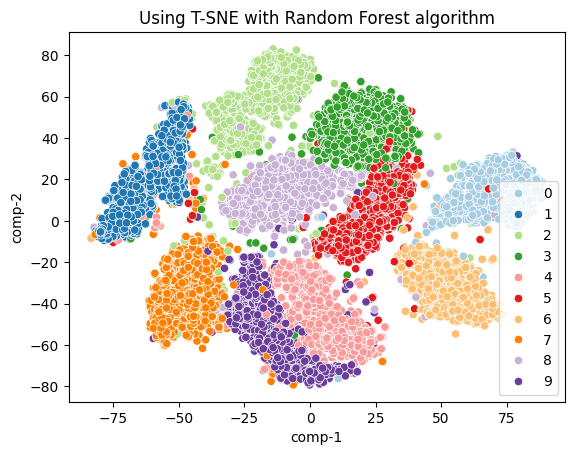

In [21]:
# TSNE Visualization after Random Forest
tsne = TSNE(n_components=2, verbose=1, random_state = 0)
z = tsne.fit_transform(X_test)
df = pd.DataFrame()
df["y"] = preds
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("Paired", 10),
                data=df).set(title="Using T-SNE with Random Forest algorithm")
plt.show()

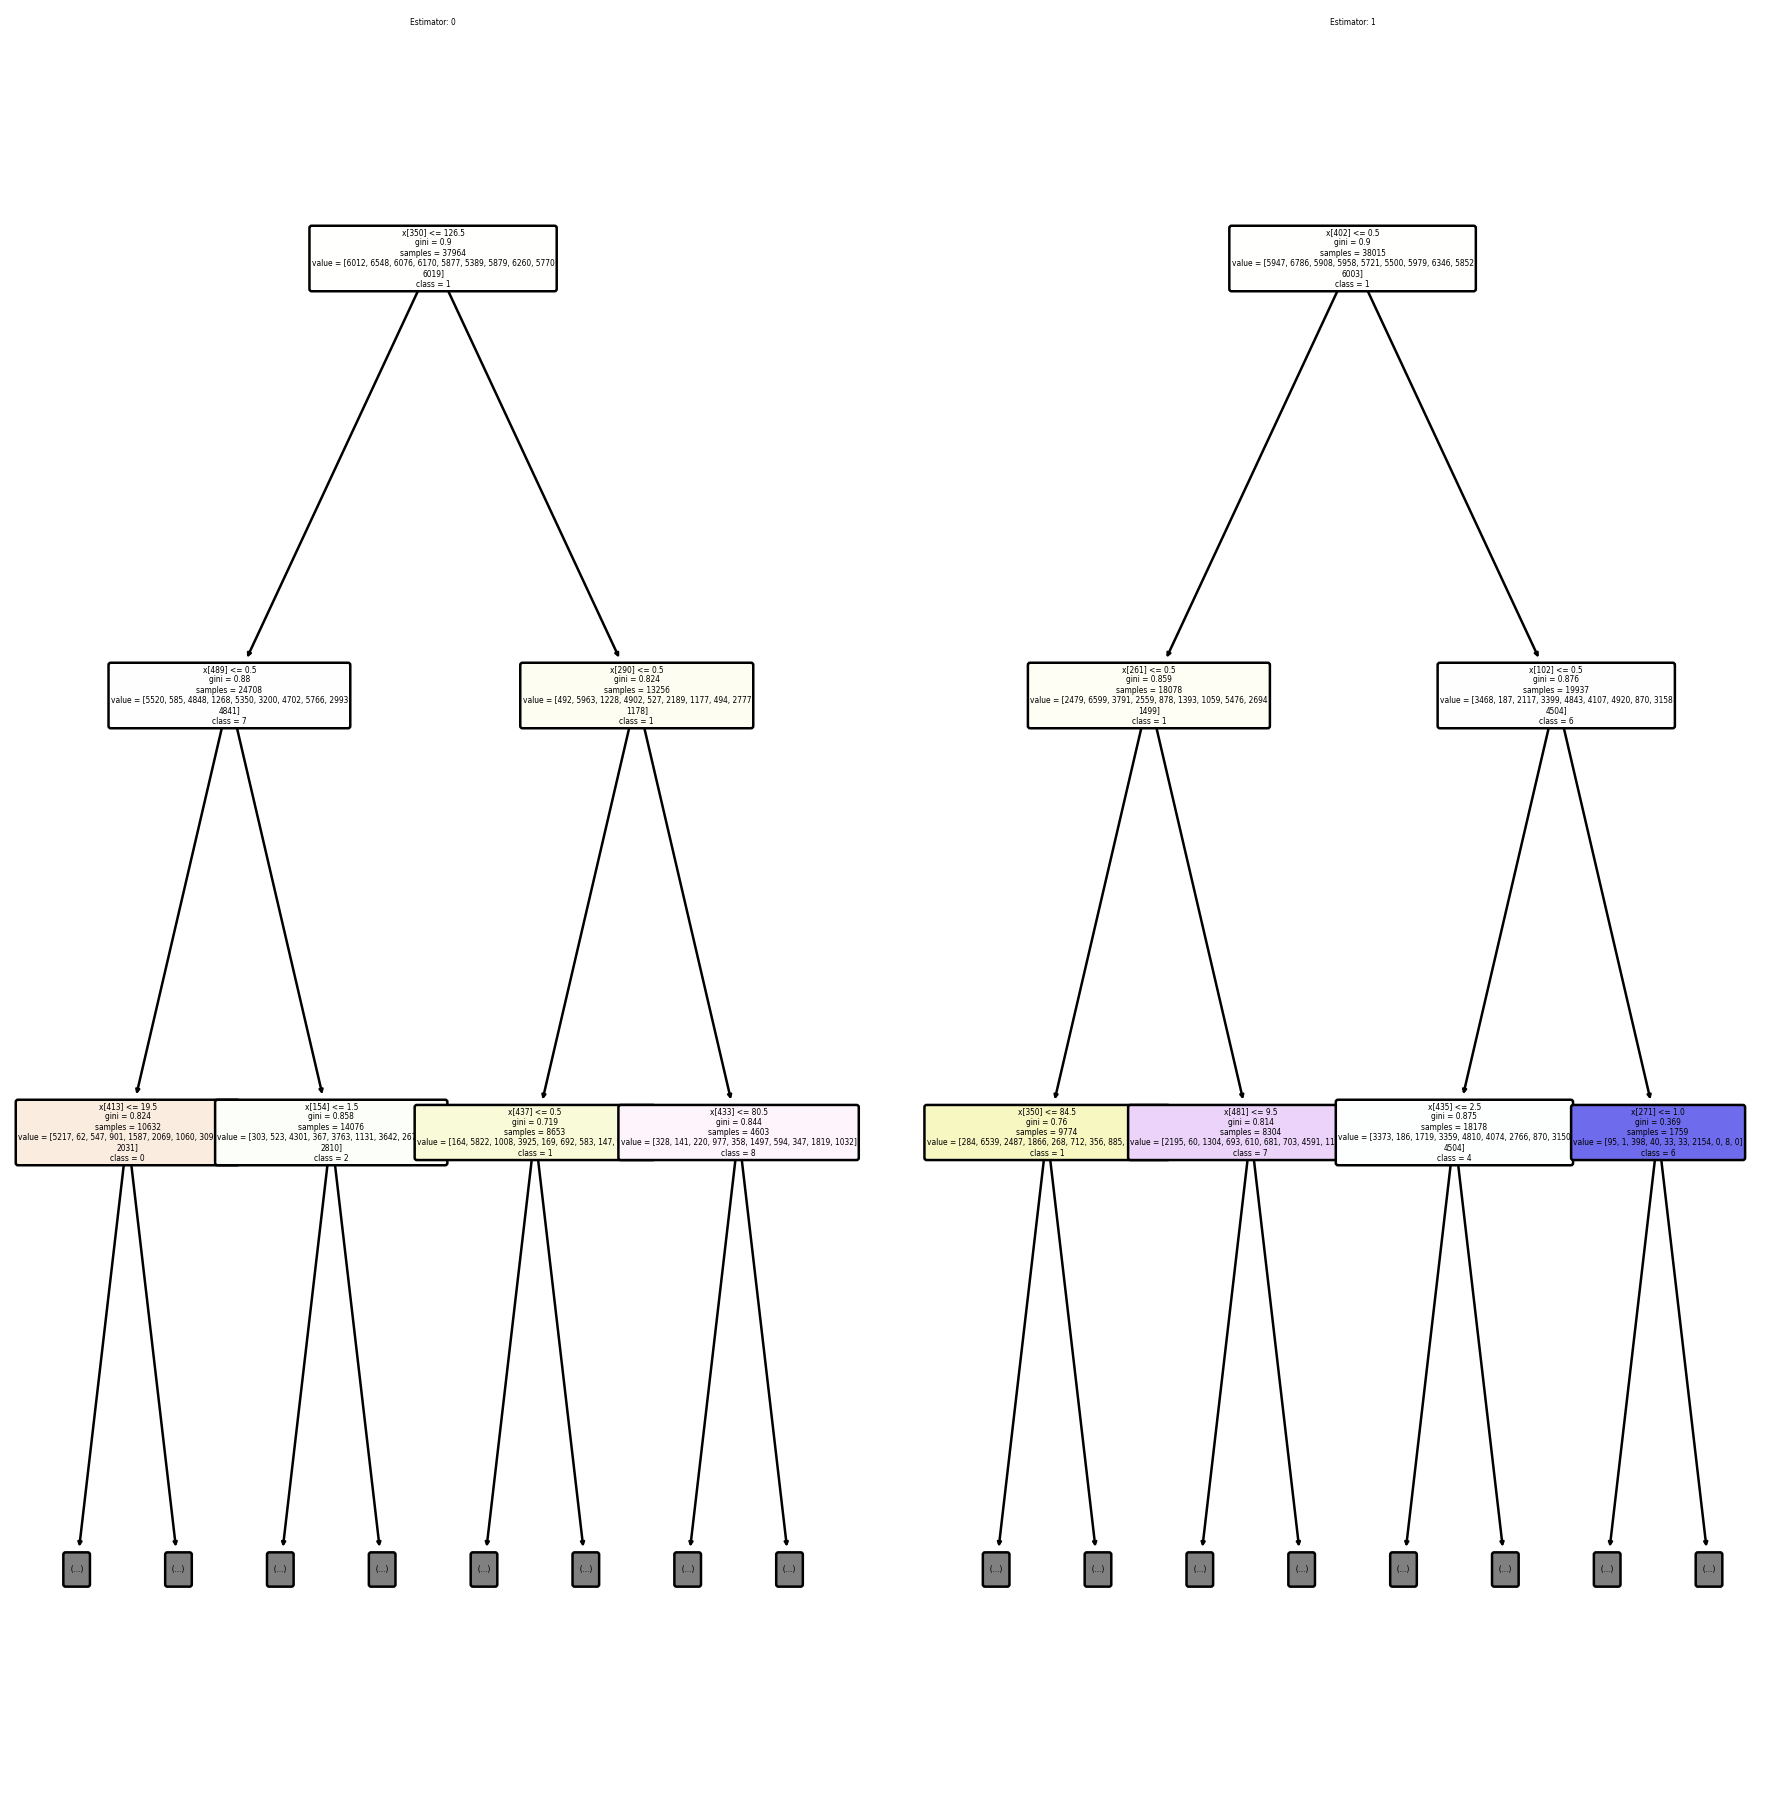

In [22]:
#Random Forest Graph
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10), dpi=180)
[axi.set_axis_off() for axi in axes.ravel()]  # turns off axes for all subplots
for i in range(0,2):
    tree.plot_tree(model.estimators_[i],
                   class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                   rounded=True,
                   max_depth=2,
                   filled=True,
                   fontsize=3,
                   ax=axes[i])
    axes[i].set_title('Estimator: ' + str(i), fontsize=3)
plt.tight_layout(pad=0.6, w_pad=1.0, h_pad=1.0)
plt.show()

